Duygu Nur Arabaci Data Analysis and Visualization Final

Problem 1

In [ ]:
dataset_dir = "final_data/kaggle"
def problem1(dataset_dir):
    import os
    import re
    import pandas as pd
    import matplotlib.pyplot as plt
    
    file_list = os.listdir(dataset_dir)

    #rename the files to the names between strings "olist_" and "_dataset"
    start = "olist_"
    end = "_dataset"
    #for all the files that start with olist find the string between start and end strings, and rename
    for file in file_list:
        if file.startswith(start):
            name = re.search("%s(.*)%s" % (start, end), file).group(1)
            os.rename(os.path.join(dataset_dir,file),dataset_dir+"/"+name+".csv")
    
    #merge the files in order
    data=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.read_csv(dataset_dir + "/" + 'order_items.csv')
                                                      ,pd.read_csv(dataset_dir + "/" +'products.csv'))
                                             ,pd.read_csv(dataset_dir + "/" +'product_category_name_translation.csv'))
                                    ,pd.read_csv(dataset_dir + "/" +'orders.csv'))
                           ,pd.read_csv(dataset_dir + "/" +'sellers.csv'))
                  ,pd.read_csv(dataset_dir + "/" +'customers.csv'))
    #get the top 10 of both
    customer = data.customer_city.value_counts()[:10]
    seller = data.seller_city.value_counts()[:10]
    #plot according to given parameters
    df = pd.DataFrame({'customer city': customer,'seller city': seller}, index = customer.to_frame().index.union(seller.to_frame().index, sort = False))
    ax = df.plot.bar(rot=90, figsize = (10,6))
    plt.ylabel("Number of Orders")
    plt.show()

In [ ]:
problem1("final_data/kaggle")

Problem 2

In [ ]:
dataset_dir = "final_data/kaggle"    
def problem2(dataset_dir):
    import os
    import re
    import pandas as pd
    import matplotlib.pyplot as plt

    file_list = os.listdir(dataset_dir)

    #rename the files to the names between strings "olist_" and "_dataset"
    start = "olist_"
    end = "_dataset"
    #for all the files that start with olist find the string between start and end strings, and rename
    for file in file_list:
        if file.startswith(start):
            name = re.search("%s(.*)%s" % (start, end), file).group(1)
            os.rename(os.path.join(dataset_dir,file),dataset_dir+"/"+name+".csv")

    #merge the files in order
    data=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.read_csv(dataset_dir + "/" + 'order_items.csv')
                                                      ,pd.read_csv(dataset_dir + "/" +'products.csv'))
                                             ,pd.read_csv(dataset_dir + "/" +'product_category_name_translation.csv'))
                                    ,pd.read_csv(dataset_dir + "/" +'orders.csv'))
                           ,pd.read_csv(dataset_dir + "/" +'sellers.csv'))
                  ,pd.read_csv(dataset_dir + "/" +'customers.csv'))
    relations = pd.DataFrame(data, columns=['customer_city', 'seller_city'])
    relations["orders"]= relations.customer_city + ", " +  relations.seller_city  
    relations["orders"]=relations["orders"].map(lambda x: "(" + x + ")" if x.split(", ")[1] > x.split(", ")[0] else "(" + x.split(", ")[1] + ', ' + x.split(", ")[0] + ")")

    new = relations[relations.seller_city != relations.customer_city].orders.value_counts().to_frame()
    display(new[:10])

In [ ]:
problem2(dataset_dir)

Problem 3

In [ ]:
def problem3(directory):
    import pandas as pd
    import matplotlib.pyplot as plt
    raw_data = pd.read_csv(directory,encoding="latin-1",parse_dates =["ReportPeriod"], index_col ="ReportPeriod").drop(
        columns = ["DataExtractDate", "Arrival_Departure", "CargoType"]).drop_duplicates()
    raw_data["year"] = raw_data.index.year
    raw_data
    data=raw_data.pivot_table("AirCargoTons",index="year",columns="Domestic_International",aggfunc="sum")
    data.plot(kind="bar", figsize = (10,6))
    plt.ylabel("Tons")
    plt.xlabel("ReportPeriod")
    plt.legend(title = False)
    plt.show()

In [ ]:
directory = "final_data/los-angeles-international-airport-air-cargo-volume.csv"
problem3(directory)

Problem 4

In [ ]:
directory = "final_data/global-city-population-estimates.xls"
year = "2015"

In [ ]:
def problem4(directory, year):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    #read excel file with the sheet selected
    data = pd.read_excel(directory, sheet_name = "CITIES-OVER-300K")
    #get the top 10 data, but in reverse to get the plot in reverse
    top10 = data.sort_values(by = year).tail(n=10)
    #top10yr= top10[year][-10:]
    
    #reverse the top10 for the bar plot
    bot10 = top10.iloc[::-1]
    

    
    def bar_plot():
        
        plot = top10.plot.barh(x= "Urban Agglomeration", y= year, figsize = (10,6), width = 0.8)
    
        #labels
        plt.xlabel("population (thousands)", fontsize = 15)
        plt.ylabel("")
        
        #format of plot
        plt.legend().remove()
        plt.yticks([])

        plt.text(30000, 0.2, s = year, fontsize=25, color = 'red', fontweight ='bold')

        #add text over each bar

        z=9
        for i,v in enumerate(top10[year]):
            plot.text(v, i, str(bot10["Urban Agglomeration"][z]), color='black', fontweight='bold',ha='right', va='bottom', fontsize = 12)
            plot.text(v, i, str(bot10["Country or area"][z]), color='black', fontweight='bold',ha='right', va='top', fontsize = 8)
            z=z-1
        
    
    def pie_plot(data, top10):
        import pandas as pd
        import matplotlib.pyplot as plt

        #read excel file with the sheet selected
        data = pd.read_excel(directory, sheet_name = "CITIES-OVER-300K")
        #get the top 10 data, but in reverse to get the plot in reverse
        top10 = data.sort_values(by = year).tail(n=10)
        #the pie plot
        top_all = top10[year].sum()
        top10["percentage"] = top10[year].map(lambda x: 100*x/top_all)
        pie = plt.pie(top10["percentage"], labels=top10["Urban Agglomeration"],  autopct='%1.1f%%',startangle=90)

        #plt.rcParams["figure.figsize"] = (6,6)
        plt.setp(pie[1], fontsize=15)
        plt.setp(pie[2], fontsize=15)
        plt.show()
    
    pie_plot(data, top10)
    bar_plot()

In [ ]:
problem4(directory, year)

Problem 5

In [ ]:
def problem5(directory):
    import pandas as pd
    import numpy as np
    data = pd.read_csv(directory,encoding="latin-1",parse_dates =["Created Date"])
    data_Date_Index = data.set_index("Created Date").groupby(pd.Grouper(freq='D')).count()
    data_Date_Index_Sorted = data_Date_Index.sort_values(by=['Unnamed: 0'], ascending = False)

    date = np.datetime_as_string(data_Date_Index_Sorted.index.values)[0][:10]
    display(date)

In [ ]:
directory = "final_data/311-service-requests.csv"
problem5(directory)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

d= {'English': [113], 'German': [90]}
top10 = pd.DataFrame(data=d)
plot = top10.plot.barh(x= "Urban Agglomeration", y= year, figsize = (10,6), width = 0.8)

#labels
plt.xlabel("population (thousands)", fontsize = 15)
plt.ylabel("")

#format of plot
plt.legend().remove()
plt.yticks([])

plt.text(30000, 0.2, s = year, fontsize=25, color = 'red', fontweight ='bold')

#add text over each bar

z=9
for i,v in enumerate(top10[year]):
    plot.text(v, i, str(bot10["Urban Agglomeration"][z]), color='black', fontweight='bold',ha='right', va='bottom', fontsize = 12)
    plot.text(v, i, str(bot10["Country or area"][z]), color='black', fontweight='bold',ha='right', va='top', fontsize = 8)
    z=z-1

<BarContainer object of 1 artists>

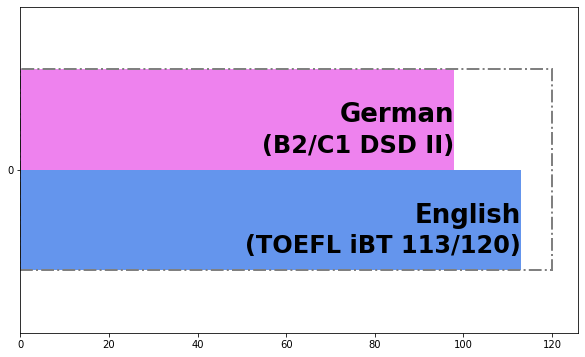

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import matplotlib.pyplot as plt; plt.rcdefaults()
d= {'English': [113], 'German': [98]}
#, "": [120]
plot.barh(0,  120,   edgecolor='grey', color='grey',  linewidth=2, linestyle='-.')

top10 = pd.DataFrame(data=d)
#top10.plot.barh()

#plt.yticks([])

plot = top10.plot.barh( figsize = (10,6), width = 0.8,color=("cornflowerblue", "violet"))

plot.text(top10["German"], 0.17, "German", color='black', fontweight='bold',ha='right', va='bottom', fontsize = 26)
plot.text(top10["German"], 0.05, "(B2/C1 DSD II)", color='black', fontweight='bold',ha='right', va='bottom', fontsize = 24)
plot.text(top10["English"], -0.35, "(TOEFL iBT 113/120)", color='black', fontweight='bold',ha='right', va='bottom', fontsize = 24)

plot.text(top10["English"], -0.13, "English", color='black', fontweight='bold',ha='right', va='top', fontsize = 26)
plot.legend().remove()

#plt.bar(0.17, 0.10, color="None")
#plt.bar(120,  -1, width=0.4, edgecolor='black', color='None',  linewidth=0.75, linestyle='-.')

plot.barh(0,  120,   edgecolor='grey', color='None',  linewidth=2, linestyle='-.')

#ax = plt.subplot(111)
plot.barh(120, 5,color='r',align='center')
#plt.show()